In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('credit_card_transactions.csv')

In [ ]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last',
                 'merchant', 'zip', 'city_pop', 'trans_num', 'unix_time',
                 'merch_zipcode', 'dob', 'lat', 'long', 'merch_lat', 'merch_long'], inplace=True)

In [ ]:
df.duplicated().sum()

23886

In [ ]:
df.head(5)

,category,amt,gender,street,city,state,job,is_fraud
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,0
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,0
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,0
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,0


In [ ]:
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])
df['gender'] = encoder.fit_transform(df['gender'])
df['street'] = encoder.fit_transform(df['street'])
df['city'] = encoder.fit_transform(df['city'])
df['state'] = encoder.fit_transform(df['state'])
df['job'] = encoder.fit_transform(df['job'])

In [ ]:
X = df.drop(columns=['is_fraud'], axis=1)
y = df['is_fraud']

In [ ]:
X.shape,y.shape

((1296675, 7), (1296675,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9330982023274885
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    386751
           1       0.06      0.79      0.12      2252

    accuracy                           0.93    389003
   macro avg       0.53      0.86      0.54    389003
weighted avg       0.99      0.93      0.96    389003



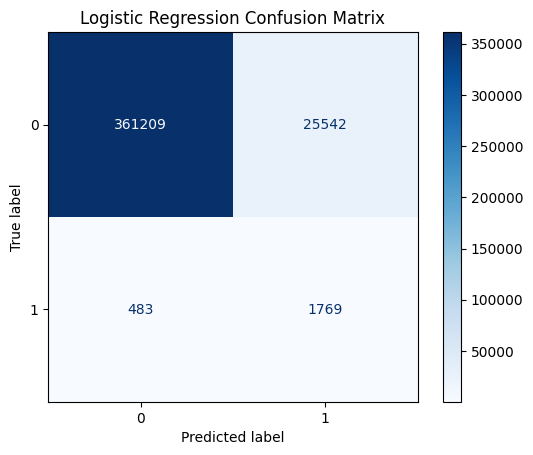

In [ ]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(confusion_matrix=cm_log_reg).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.987216036894317
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    386751
           1       0.28      0.75      0.40      2252

    accuracy                           0.99    389003
   macro avg       0.64      0.87      0.70    389003
weighted avg       0.99      0.99      0.99    389003



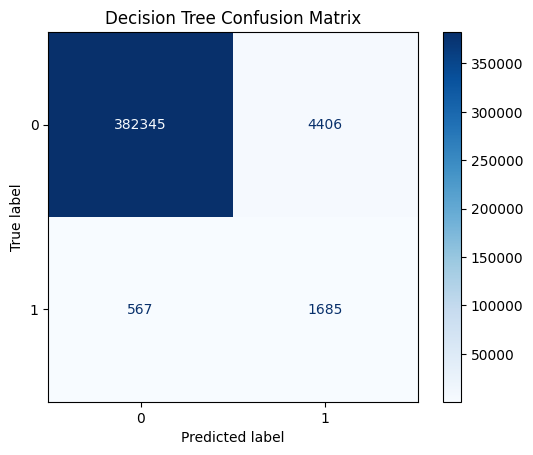

In [ ]:
cm_decision_tree = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()